In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('jobs_in_data.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [4]:
df.shape

(9355, 12)

In [5]:
df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,9355.0,2022.760449,0.519470,2020.0,2023.0,2023.0,2023.0,2023.0
salary,9355.0,149927.981293,63608.835387,14000.0,105200.0,143860.0,187000.0,450000.0
salary_in_usd,9355.0,150299.495564,63177.372024,15000.0,105700.0,143000.0,186723.0,450000.0


In [7]:
df.describe(include= 'O').T

,count,unique,top,freq
job_title,9355,125,Data Engineer,2195
job_category,9355,10,Data Science and Research,3014
salary_currency,9355,11,USD,8591
employee_residence,9355,83,United States,8086
experience_level,9355,4,Senior,6709
employment_type,9355,4,Full-time,9310
work_setting,9355,3,In-person,5730
company_location,9355,70,United States,8132
company_size,9355,3,M,8448


In [8]:
df.job_title.value_counts()

Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
                                  ... 
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
AWS Data Architect                   1
Deep Learning Researcher             1
Name: job_title, Length: 125, dtype: int64

In [9]:
df.work_year.value_counts()

2023    7453
2022    1634
2021     197
2020      71
Name: work_year, dtype: int64

In [10]:
Mean_sal_over_Years = df.groupby(by= 'work_year').agg({'salary_in_usd': 'mean'})
Mean_sal_over_Years

,salary_in_usd
work_year,
2020,105878.859155
2021,106483.644670
2022,135467.501836
2023,155132.591708


In [11]:
# Another way to get same results without using 'agg' method

Mean_sal_over_Years = df.groupby(by= 'work_year')[['salary_in_usd']].mean().sort_values(by= 'salary_in_usd', ascending  = True)
Mean_sal_over_Years

,salary_in_usd
work_year,
2020,105878.859155
2021,106483.644670
2022,135467.501836
2023,155132.591708


## Mean Salary over Years

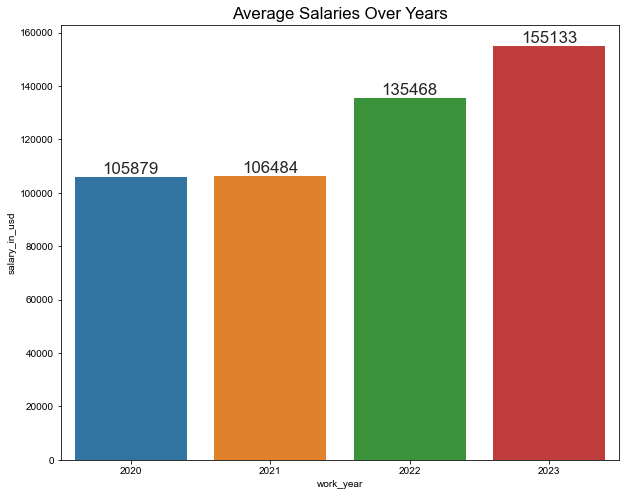

In [12]:
plt.figure(figsize= (10,8))

a = sns.barplot(x = Mean_sal_over_Years.index, y= Mean_sal_over_Years.salary_in_usd, ci= None)
sns.set(font_scale=1.4)

for i in a.containers:
    a.bar_label(i)

plt.title('Average Salaries Over Years')
plt.show()

In [13]:
top_5_jobs = df.job_title.value_counts().head(5)
top_5_jobs

Data Engineer                2195
Data Scientist               1989
Data Analyst                 1388
Machine Learning Engineer     991
Applied Scientist             272
Name: job_title, dtype: int64

## Top 5 job distribution

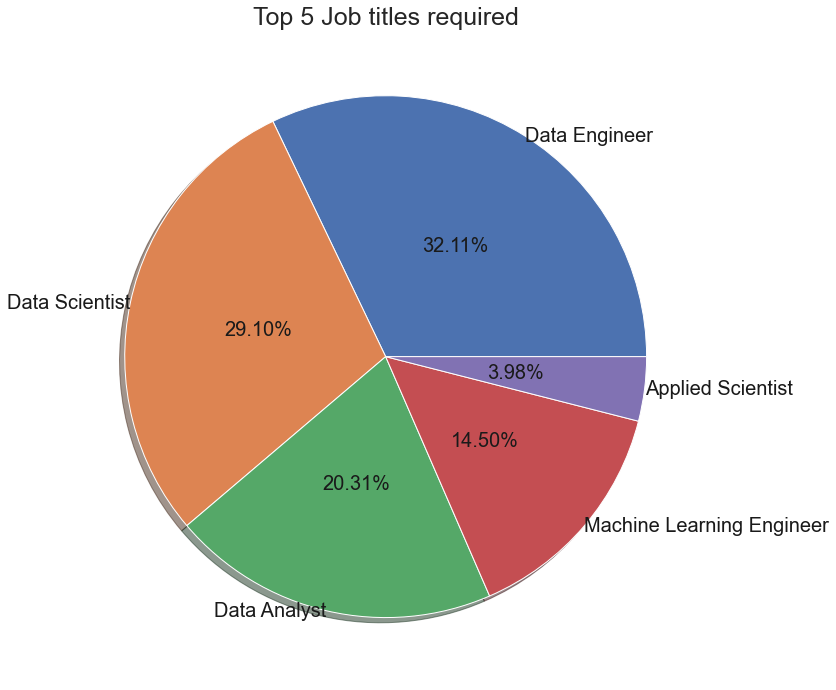

In [14]:
plt.figure(figsize= (14,12))

plt.pie(top_5_jobs.values, labels= top_5_jobs.index, shadow= True, autopct= '%0.2f%%', pctdistance= 0.5,
        textprops= {'fontsize' : 20, 'color' : 'k', 'fontweight':100}, labeldistance= 1, rotatelabels= False)

plt.title('Top 5 Job titles required', fontdict= {'fontsize': 25})
plt.show()

##  Job category vs their avg salaries

In [15]:
Avg_job_category = df.groupby(by= 'job_category')[['salary_in_usd']].mean().sort_values(by= 'salary_in_usd', ascending  = True)
Avg_job_category

,salary_in_usd
job_category,
Data Quality and Operations,100879.472727
Data Management and Strategy,103139.934426
Data Analysis,108505.721345
BI and Visualization,135092.102236
Leadership and Management,145476.019881
Data Engineering,146197.656195
Cloud and Database,155000.000000
Data Architecture and Modeling,156002.359073
Data Science and Research,163758.575979


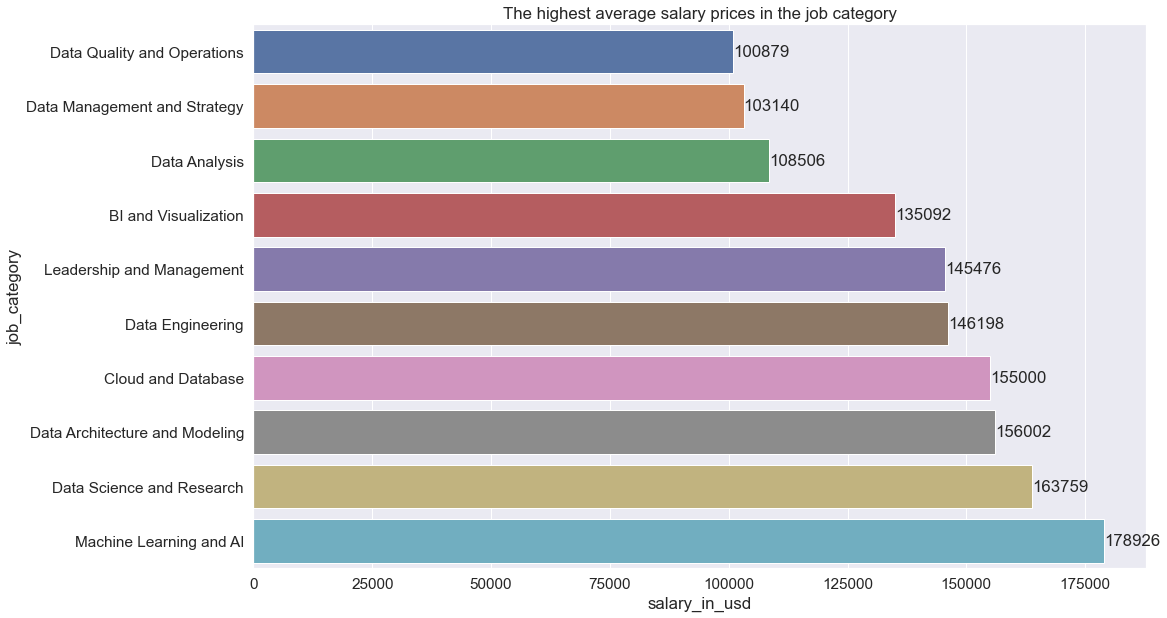

In [16]:
plt.figure(figsize= (16,10))

a = sns.barplot(x=  Avg_job_category.salary_in_usd, y=Avg_job_category.index, ci= None)
sns.set(font_scale=1.4)

for i in a.containers:
    a.bar_label(i)

plt.title('The highest average salary prices in the job category')
plt.show()

## Distribution Plot

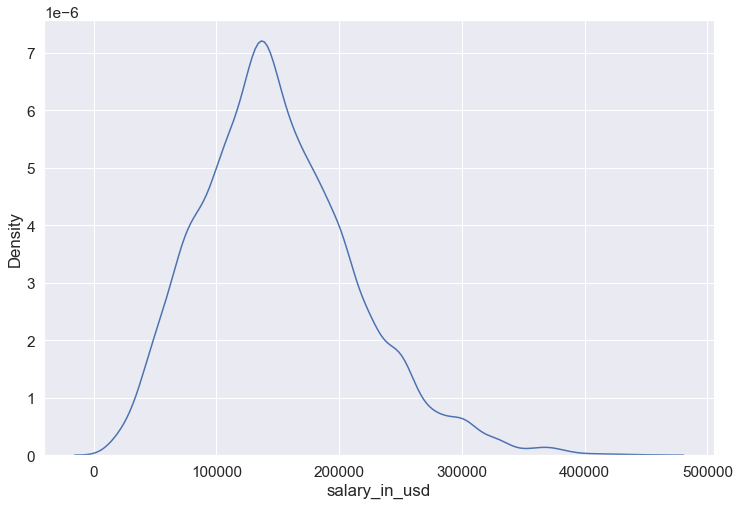

In [17]:
plt.figure(figsize= (12,8))

sns.kdeplot(df.salary_in_usd)
plt.show()

## Outlier detection in Salaries

In [18]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [19]:
Q1 = df['salary_in_usd'].quantile(.25)
Q3 = df['salary_in_usd'].quantile(.75)

print(f'Q1 = {Q1}')
print(f'Q3 = {Q3}')

Q1 = 105700.0
Q3 = 186723.0


In [20]:
# IQR detection

IQR = Q3-Q1
IQR

81023.0

In [21]:
Upper_limit = Q3 + 1.5*IQR
Lower_limit = Q1 - 1.5*IQR

print(f'Upper Limit is: {Upper_limit}')
print(f'Lower Limit is: {Lower_limit}')

Upper Limit is: 308257.5
Lower Limit is: -15834.5


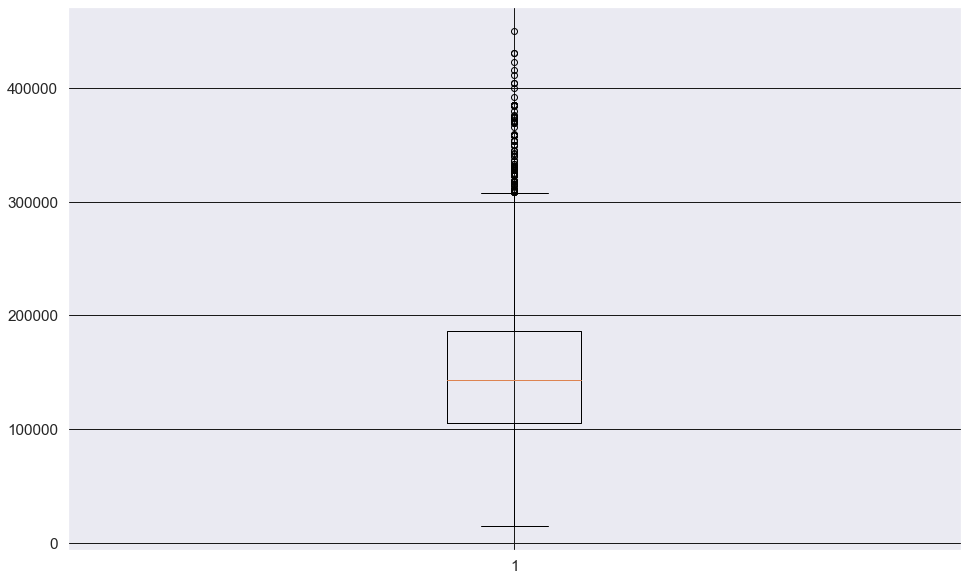

In [22]:
plt.figure(figsize= (16,10))

plt.boxplot(df.salary_in_usd)

plt.grid(True, color= 'k')
plt.show()

## Salaries in outlier range

In [23]:
Sal_Outliers=df[df.salary_in_usd > Upper_limit][['job_category', 'employee_residence', 'experience_level', 'work_setting']]
Sal_Outliers

,job_category,employee_residence,experience_level,work_setting
263,Machine Learning and AI,United States,Senior,Remote
415,Machine Learning and AI,United States,Senior,In-person
515,Machine Learning and AI,United States,Senior,In-person
537,Data Science and Research,United States,Senior,In-person
589,Machine Learning and AI,United States,Senior,In-person
...,...,...,...,...
9157,Data Science and Research,United States,Mid-level,In-person
9287,Data Science and Research,United States,Executive,Remote
9304,Data Science and Research,United States,Executive,Remote
9348,Machine Learning and AI,United States,Mid-level,Hybrid


In [24]:
Sal_Outliers.job_category.value_counts().head()

Data Science and Research         64
Machine Learning and AI           60
Data Engineering                  17
Leadership and Management          9
Data Architecture and Modeling     4
Name: job_category, dtype: int64

In [25]:
# It's interesting to observe that highest Salaries are offered in the field of "Machine Learning and AI",

# but, highest no. of Outlier Salaries are offered in the job category of "Data Science and Research"

In [26]:
Sal_Outliers.employee_residence.value_counts().head()

United States     151
United Kingdom      6
France              1
Name: employee_residence, dtype: int64

In [27]:
Sal_Outliers.experience_level.value_counts()

Senior       128
Executive     21
Mid-level      9
Name: experience_level, dtype: int64

## Top avg Salary Prices of different Job categories in US and Germany(DE)

In [28]:
Salary_US=df[((df.job_category=='Data Science and Research')|(df.job_category=='Data Engineering')|
                        (df.job_category=='Data Analysis')|(df.job_category=='Machine Learning and AI')
                        |(df.job_category=='Leadership and Management'))&(df.company_location=='United States')]
Salary_US

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
5,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Senior,Full-time,Remote,United States,M
6,2023,Data Scientist,Data Science and Research,USD,100000,100000,United States,Senior,Full-time,Remote,United States,M
7,2023,Machine Learning Researcher,Machine Learning and AI,USD,224400,224400,United States,Mid-level,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9348,2021,Applied Machine Learning Scientist,Machine Learning and AI,USD,423000,423000,United States,Mid-level,Full-time,Hybrid,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [29]:
avg_salary_US = Salary_US.groupby(by= 'job_category').agg({'salary_in_usd': 'mean'}).sort_values(by = 'salary_in_usd', ascending= False)
avg_salary_US

,salary_in_usd
job_category,
Machine Learning and AI,191053.835294
Data Science and Research,173070.068311
Data Engineering,154230.576631
Leadership and Management,148340.846154
Data Analysis,113701.714058


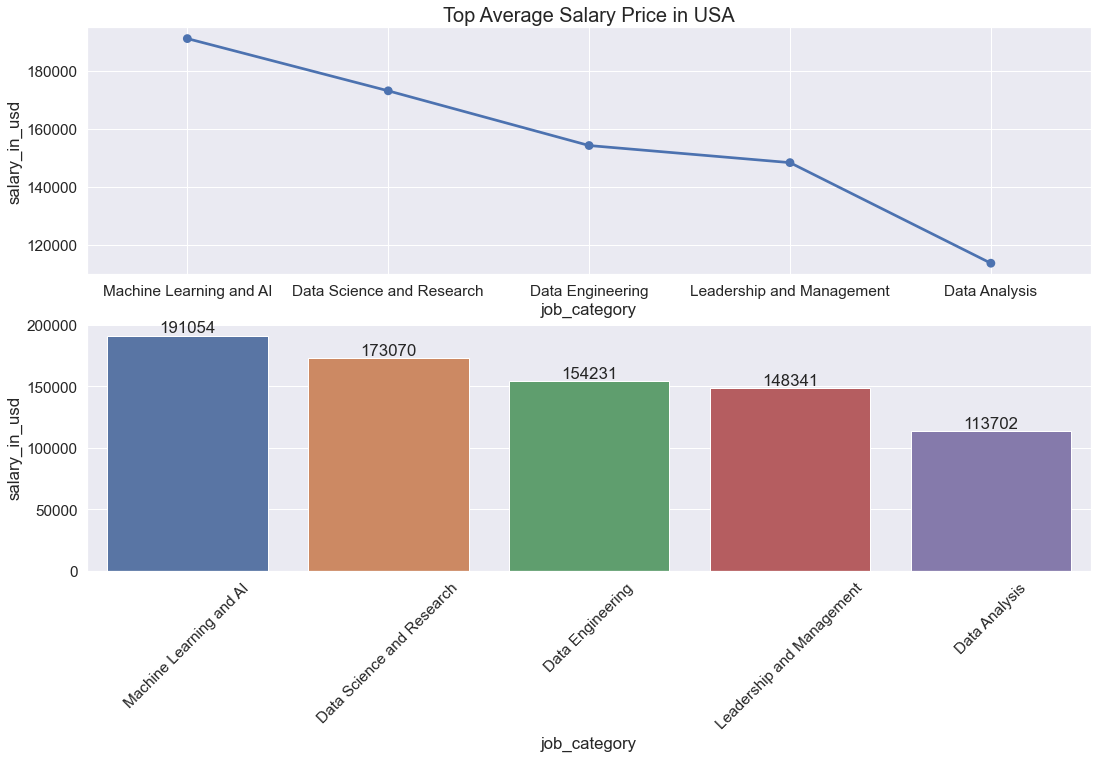

In [30]:
plt.figure(figsize= (18,10))

plt.subplot(2,1,1)
sns.pointplot(x = avg_salary_US.index, y= avg_salary_US.salary_in_usd)
sns.set(font_scale=1.4)

plt.title('Top Average Salary Price in USA', {'fontsize': '20'})
plt.grid(True)

plt.subplot(2,1,2)
a = sns.barplot(x= avg_salary_US.index, y= avg_salary_US.salary_in_usd, ci= None)
sns.set(font_scale=1.4)
plt.xticks(rotation = 45)

for i in a.containers:
    a.bar_label(i)

plt.show()

In [31]:
Salary_Germany=df[((df.job_category=='Data Science and Research')|(df.job_category=='Data Engineering')|
                        (df.job_category=='Data Analysis')|(df.job_category=='Machine Learning and AI')
                        |(df.job_category=='Leadership and Management'))&(df.company_location=='Germany')]
Salary_Germany

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
2135,2023,Data Analyst,Data Analysis,EUR,39000,42107,Germany,Mid-level,Full-time,Hybrid,Germany,M
2290,2023,AI Engineer,Machine Learning and AI,USD,35000,35000,Croatia,Entry-level,Full-time,Remote,Germany,M
2882,2023,AI Scientist,Machine Learning and AI,EUR,60000,64781,Germany,Senior,Full-time,Hybrid,Germany,L
3543,2023,Data Engineer,Data Engineering,EUR,100000,107968,Germany,Senior,Full-time,Remote,Germany,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9296,2021,Data Scientist,Data Science and Research,EUR,75000,88654,Germany,Mid-level,Full-time,Hybrid,Germany,L
9313,2020,Data Scientist,Data Science and Research,EUR,55000,62726,Germany,Entry-level,Full-time,Hybrid,Germany,S
9314,2021,Data Scientist,Data Science and Research,EUR,76760,90734,Germany,Mid-level,Full-time,Hybrid,Germany,L
9329,2021,Principal Data Scientist,Data Science and Research,EUR,147000,173762,Germany,Senior,Full-time,Remote,Germany,M


In [32]:
avg_salary_DE = Salary_Germany.groupby(by= 'job_category').agg({'salary_in_usd': 'mean'}).sort_values(by = 'salary_in_usd', ascending= False)
avg_salary_DE

,salary_in_usd
job_category,
Machine Learning and AI,100044.857143
Data Science and Research,96148.066667
Data Engineering,84441.538462
Leadership and Management,79197.000000
Data Analysis,56703.857143


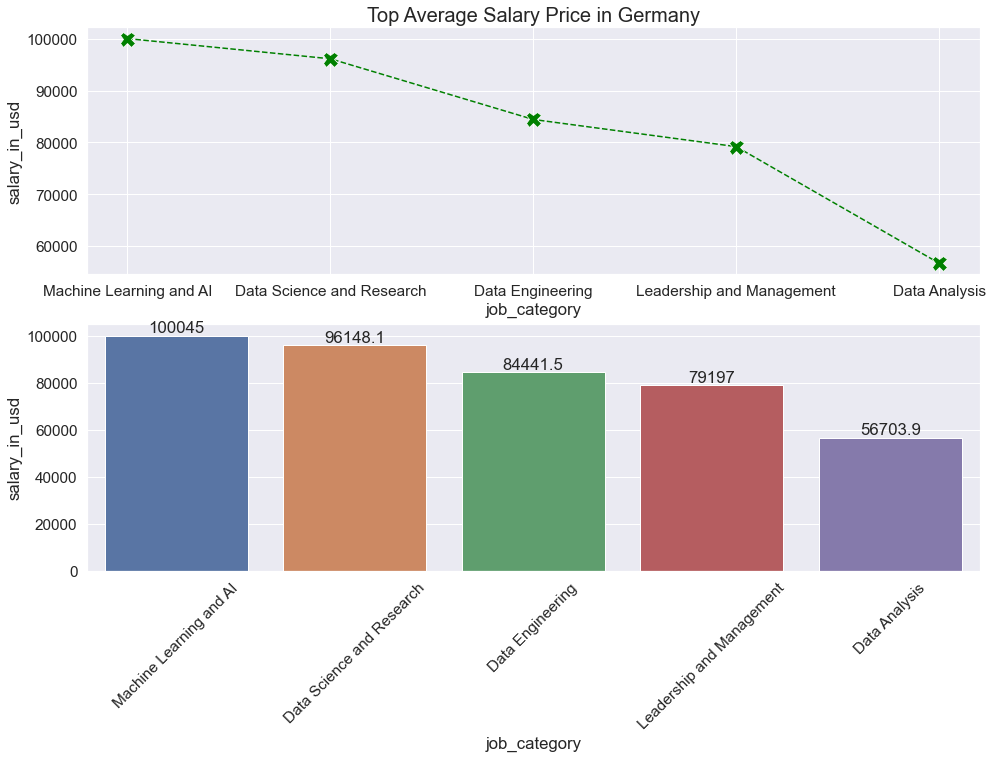

In [33]:
plt.figure(figsize= (16,10))

plt.subplot(2,1,1)
sns.lineplot(x = avg_salary_DE.index, y= avg_salary_DE.salary_in_usd, linestyle = '--', color = 'green',marker = 'X', markersize = 15)
sns.set(font_scale=1.4)

plt.title('Top Average Salary Price in Germany', {'fontsize': '20'})
plt.grid(True)

plt.subplot(2,1,2)
a = sns.barplot(x= avg_salary_DE.index, y= avg_salary_DE.salary_in_usd, ci= None)
sns.set(font_scale=1.4)
plt.xticks(rotation = 45)

for i in a.containers:
    a.bar_label(i)

plt.show()

## Location of companies of different sizes

In [34]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [35]:
df.company_size.value_counts()

M    8448
L     748
S     159
Name: company_size, dtype: int64

In [36]:
Large = df['company_location'][df.company_size == 'L'].value_counts().head()
Large

United States     556
Canada             28
United Kingdom     25
Germany            24
Netherlands        14
Name: company_location, dtype: int64

In [37]:
Medium = df['company_location'][df.company_size == 'M'].value_counts().head()
Medium

United States     7509
United Kingdom     414
Canada             193
Spain              101
France              35
Name: company_location, dtype: int64

In [38]:
Small = df['company_location'][df.company_size == 'S'].value_counts().head()
Small

United States     67
Germany           18
United Kingdom    10
Canada             5
France             5
Name: company_location, dtype: int64

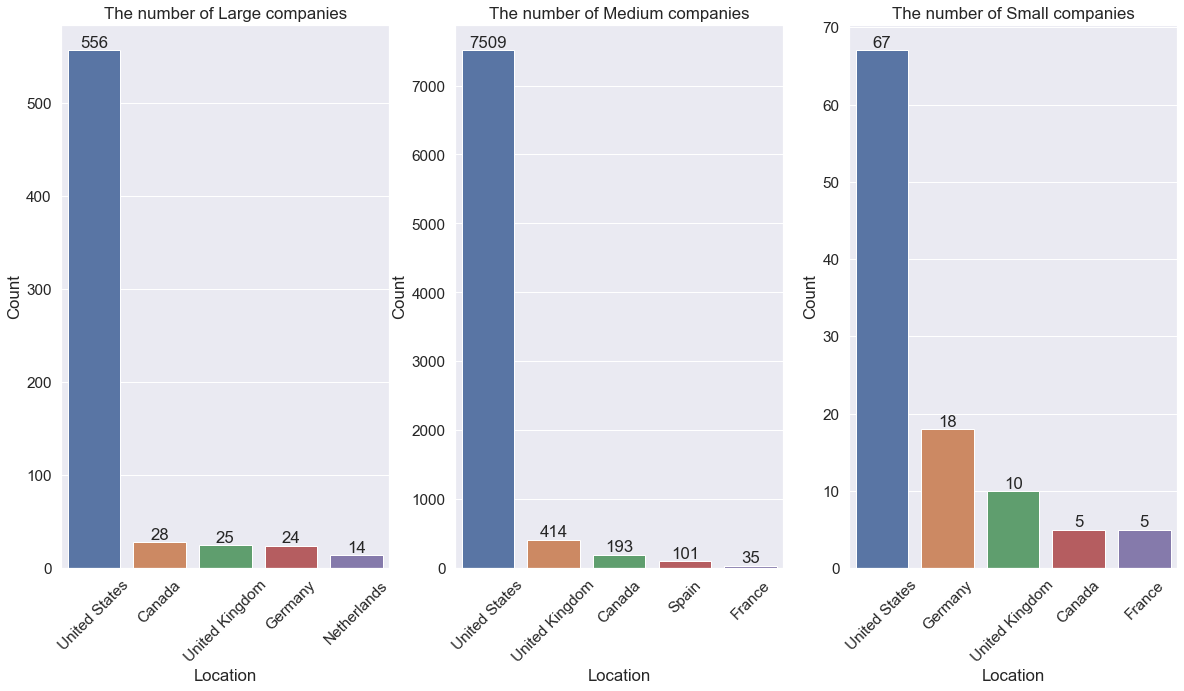

In [39]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
a = sns.barplot(x= Large.index, y= Large.values)
sns.set(font_scale=1.4)

for i in a.containers:
    a.bar_label(i)
    
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation =45)
plt.title('The number of Large companies')

plt.subplot(1,3,2)
b = sns.barplot(x= Medium.index, y= Medium.values)

for i in b.containers:
    b.bar_label(i)

plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation =45)
plt.title('The number of Medium companies')

plt.subplot(1,3,3)
c = sns.barplot(x= Small.index, y= Small.values)

for i in c.containers:
    c.bar_label(i)

plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation =45)
plt.title('The number of Small companies')

plt.show()

## Avg Salaries acc to Experience levels

In [40]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [41]:
Avg_exp = df.groupby(by='experience_level').agg({'salary_in_usd':'mean'}).sort_values(by = 'salary_in_usd', ascending= False)
Avg_exp

,salary_in_usd
experience_level,
Executive,189462.914591
Senior,162356.126099
Mid-level,117523.918138
Entry-level,88534.776210


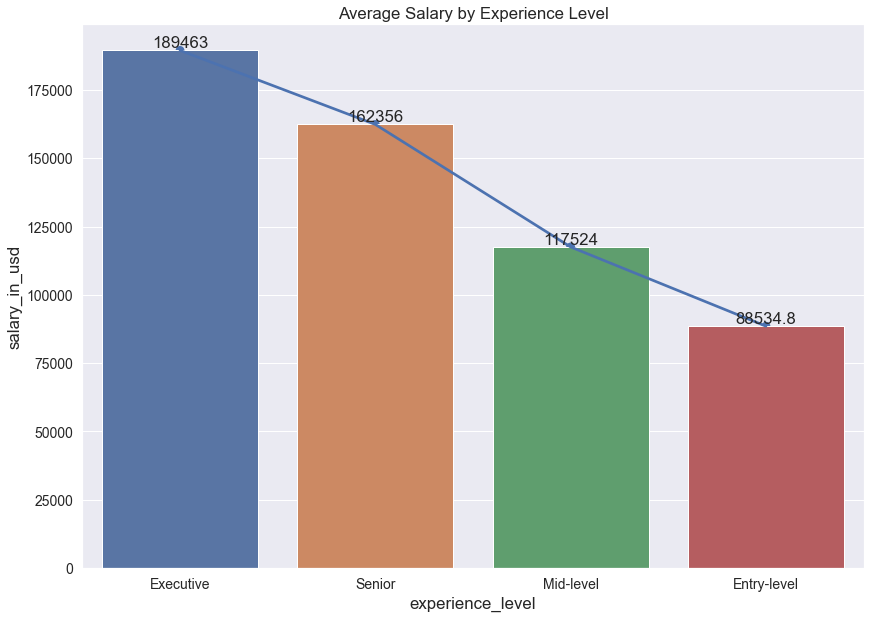

In [42]:
plt.figure(figsize= (14,10))

a = sns.pointplot(x= Avg_exp.index, y= Avg_exp.salary_in_usd, ci= None)
sns.set(font_scale=1.4)
sns.barplot(x= Avg_exp.index, y= Avg_exp.salary_in_usd, ci= None, )

for i in a.containers:
    a.bar_label(i)
    
plt.title('Average Salary by Experience Level')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Avg salaries according to respective Job title 

In [43]:
df.job_title.value_counts()

Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
                                  ... 
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
AWS Data Architect                   1
Deep Learning Researcher             1
Name: job_title, Length: 125, dtype: int64

In [44]:
Avg_Sal = df[(df.job_title == 'Data Engineer')|(df.job_title == 'Data Scientist')|(df.job_title == 'Data Analyst')|
             (df.job_title == 'Machine Learning Engineer')|(df.job_title == 'Applied Scientist')]
Avg_Sal

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
5,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Senior,Full-time,Remote,United States,M
6,2023,Data Scientist,Data Science and Research,USD,100000,100000,United States,Senior,Full-time,Remote,United States,M
9,2023,Data Engineer,Data Engineering,USD,210000,210000,United States,Executive,Full-time,Remote,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9345,2020,Machine Learning Engineer,Machine Learning and AI,EUR,40000,45618,Croatia,Senior,Full-time,Remote,Croatia,S
9347,2021,Data Scientist,Data Science and Research,SGD,160000,119059,Singapore,Mid-level,Full-time,Remote,Israel,M
9349,2021,Data Engineer,Data Engineering,EUR,24000,28369,Malta,Mid-level,Full-time,Hybrid,Malta,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L


In [45]:
Avg_Sal_title = Avg_Sal.groupby(by= 'job_title')[['salary_in_usd']].mean().sort_values(by= 'job_title', ascending = False)
Avg_Sal_title

,salary_in_usd
job_title,
Machine Learning Engineer,184785.883956
Data Scientist,156681.015083
Data Engineer,146620.095216
Data Analyst,109911.472622
Applied Scientist,190171.606618


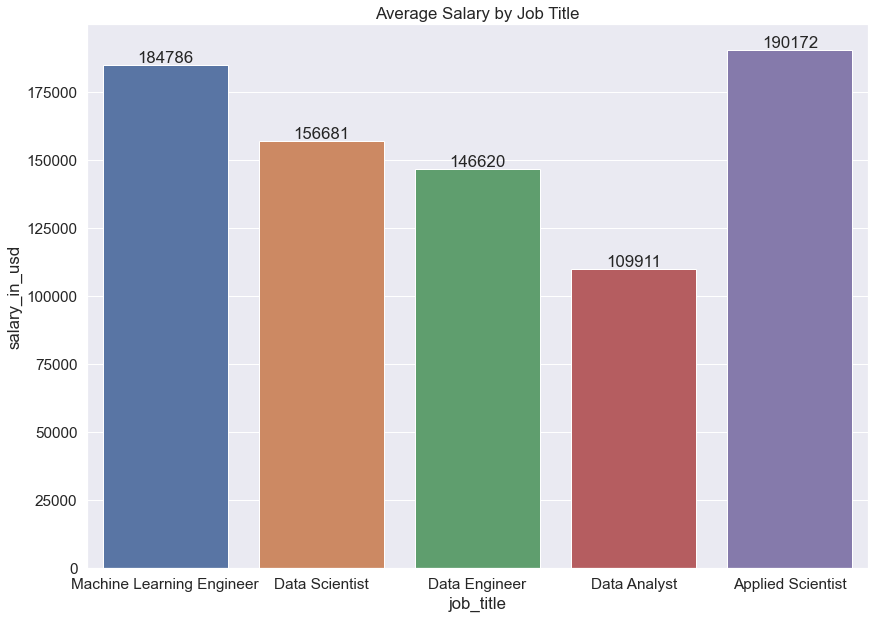

In [46]:
plt.figure(figsize= (14,10))

a = sns.barplot(x= Avg_Sal_title.index, y= Avg_Sal_title.salary_in_usd, ci= None)
sns.set(font_scale=1.4)

for i in a.containers:
    a.bar_label(i)
    
plt.title('Average Salary by Job Title')
plt.show()